<a href="https://colab.research.google.com/github/1801319/knu_bdna_1801319/blob/main/%EC%9D%B4%EC%8A%B9%EA%B8%B011%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=11d60bc21182cdab23605c205da706a2c3c2edc9c1fde335a0a31ef1d38f1ba3
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn
import matplotlib.pyplot as plt

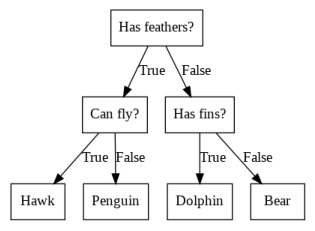

In [3]:
mglearn.plots.plot_animal_tree()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
cancer = load_breast_cancer()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [7]:
tree = DecisionTreeClassifier(random_state=0)

In [8]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
print('Training Accuracy:{:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy:{:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy:1.000
Test Accuracy:0.937


In [10]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [11]:
print('Training Accuracy:{:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy:{:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy:0.988
Test Accuracy:0.951


In [12]:
from sklearn.tree import export_graphviz

In [13]:
export_graphviz(tree,out_file='tree.dot',class_names=["0","1"])

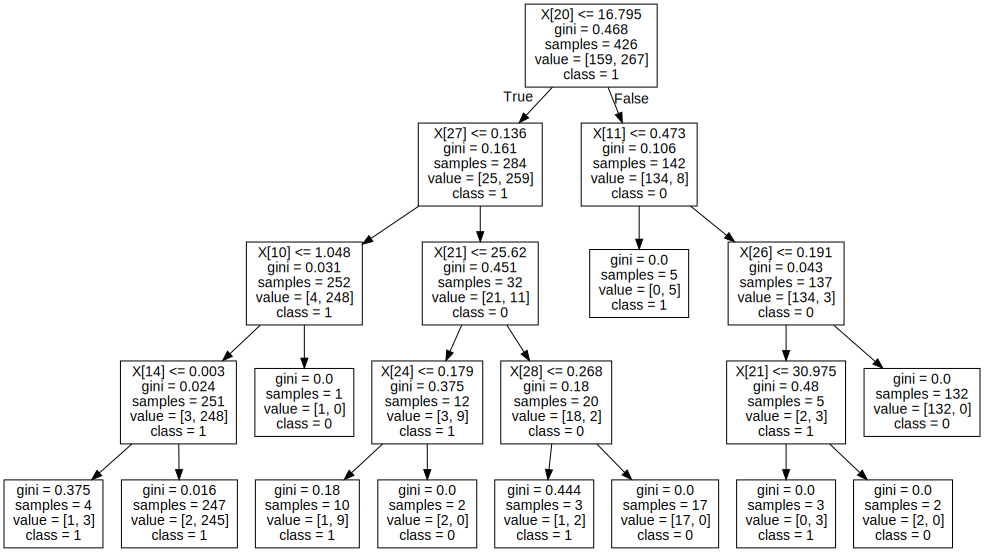

In [14]:
import graphviz
with open("tree.dot") as f:
  dot_graph =f.read()
  display(graphviz.Source(dot_graph))

In [15]:
export_graphviz(tree,out_file='tree.dot',class_names=["0","1"],feature_names=cancer.feature_names,impurity=False,filled=True)

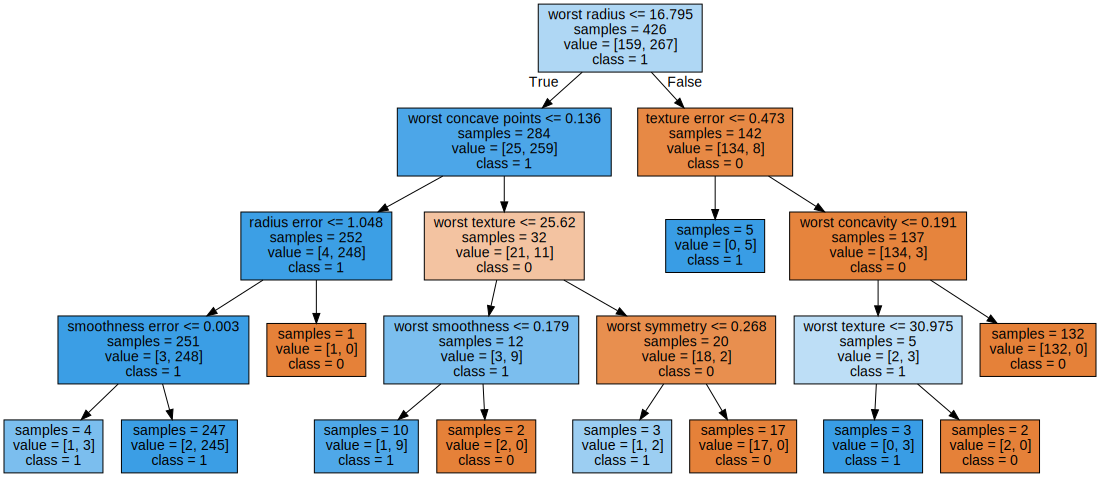

In [16]:
import graphviz
with open("tree.dot") as f:
  dot_graph =f.read()
  display(graphviz.Source(dot_graph))

In [17]:
print("Feature Importance : \n",tree.feature_importances_)

Feature Importance : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [18]:
import numpy as np

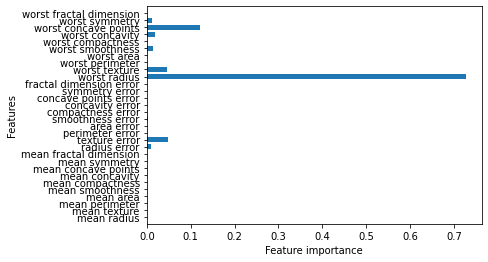

In [19]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [20]:
from sklearn.datasets import load_boston

In [21]:
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [22]:
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
tree = DecisionTreeRegressor(random_state=0)

In [25]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

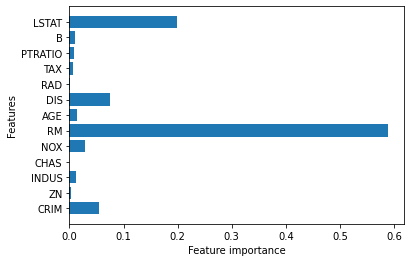

In [26]:
n_features = boston.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [29]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [30]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [31]:
print('Training Accuracy:{:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy:{:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy:0.973
Test Accuracy:0.920


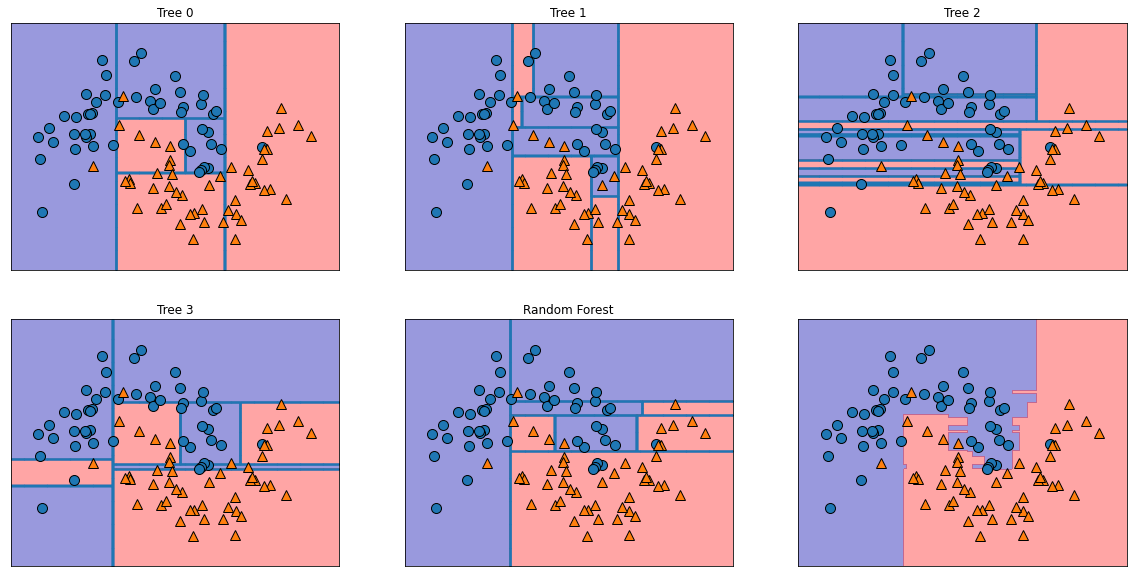

In [32]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [34]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Training Accuracy:{:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy:{:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy:1.000
Test Accuracy:0.958


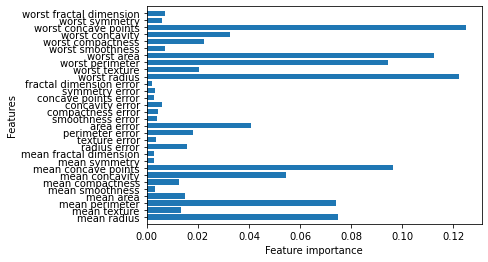

In [35]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Training Accuryacy: {:.3f}".format(gb.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test, y_test)))

Training Accuryacy: 1.000
Test Accuracy: 0.958


In [38]:
gb = GradientBoostingClassifier(max_depth=1, random_state=0)
gb.fit(X_train, y_train)
print("Training Accuryacy: {:.3f}".format(gb.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test, y_test)))

Training Accuryacy: 0.995
Test Accuracy: 0.965


In [39]:
gb = GradientBoostingClassifier(max_depth=4, learning_rate=0.01, n_estimators=300, random_state=0)
gb.fit(X_train, y_train)
print("Training Accuryacy: {:.3f}".format(gb.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test, y_test)))

Training Accuryacy: 1.000
Test Accuracy: 0.944


In [40]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

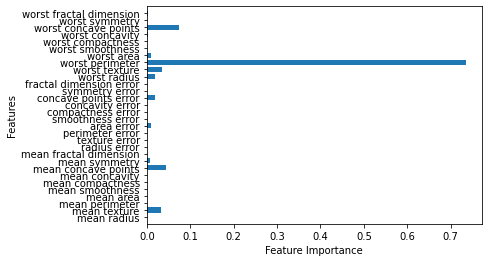

In [42]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()

In [43]:
from xgboost import XGBClassifier

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Training Accuryacy: {:.3f}".format(xgb.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(xgb.score(X_test, y_test)))

Training Accuryacy: 1.000
Test Accuracy: 0.965


In [45]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.01, n_estimators=100, random_state=0)
xgb.fit(X_train, y_train)
print("Training Accuryacy: {:.3f}".format(xgb.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(xgb.score(X_test, y_test)))

Training Accuryacy: 0.998
Test Accuracy: 0.937


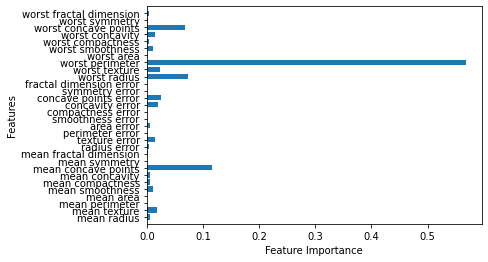

In [46]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()